In [6]:
#"PoEdata",
# Define a list of required packages
packages <- c("tseries", "vars", "nlWaldTest", "lmtest",  "car", "sandwich", "knitr", "urca", "zoo", "mFilter", "forecast", "fpp2", "devtools", "broom", "stargazer", "tidyr", "dynlm", "writexl", "Ecdat", "gdata", "rugarch")

# Loop through the list of packages and install them if they are not already installed
for(package in packages) {
  if(!require(package, character.only = TRUE)) {
    install.packages(package, dependencies = TRUE)
    library(package, character.only = TRUE)
  }
}


Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘bdsmatrix’, ‘estimability’, ‘insight’, ‘htmlwidgets’, ‘openxlsx’, ‘mitools’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘alr4’, ‘coxme’, ‘effects’, ‘leaps’, ‘MatrixModels’, ‘mvtnorm’, ‘rgl’, ‘rio’, ‘SparseM’, ‘survey’


Loading required package: carData

Loading required package: knitr

Loading required package: mFilter

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mFilter’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘deSolve’, ‘mnormt’, ‘foreach’, ‘fracdiff’, ‘timeDate’, ‘Rc

ERROR: ignored

null device 
          1

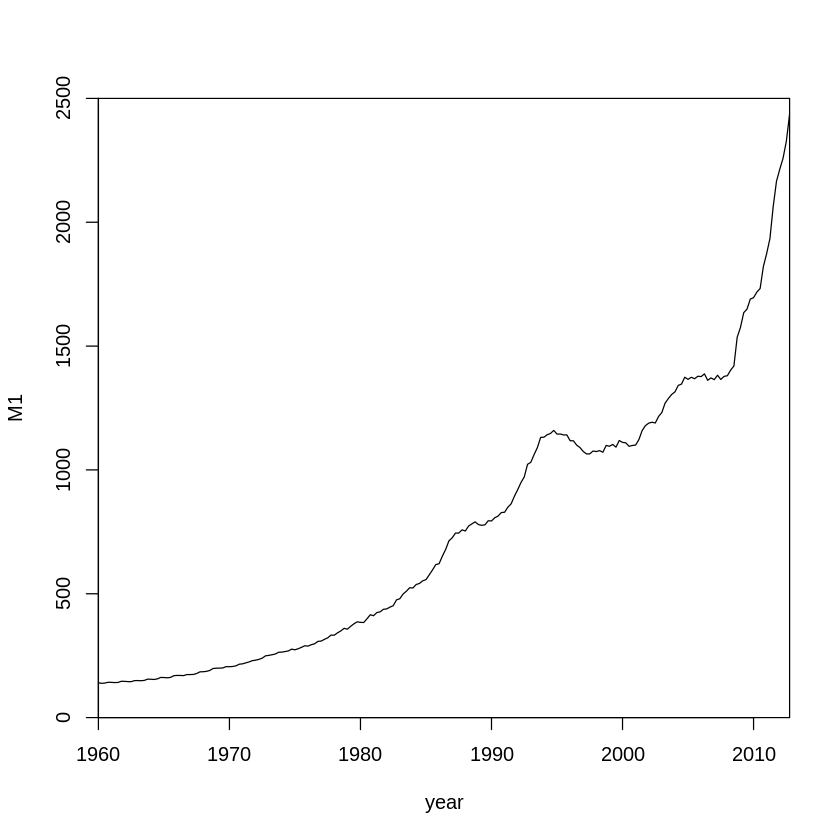

In [8]:
# Random walk	              ARIMA(0,1,0) with no constant
# Random walk with drift  	ARIMA(0,1,0) with a constant
# Autoregression	          ARIMA(p,0,0)
# Moving average	          ARIMA(0,0,q)


# - 8 -
###########################
### SEASONALITY

rm(list=ls())
data = read.csv("/content/quarterly.csv")
data$DATE = as.yearqtr(data$DATE, format="%YQ%q")

# - 8 a -
plot(data$DATE,data$M1NSA,type="l",xaxs="i" ,xlab="year",ylab="M1",yaxs="i",ylim=c(0,2500))



In [10]:
mg = 100*diff(log(data$M1NSA))
dev.off()


null device 
          1

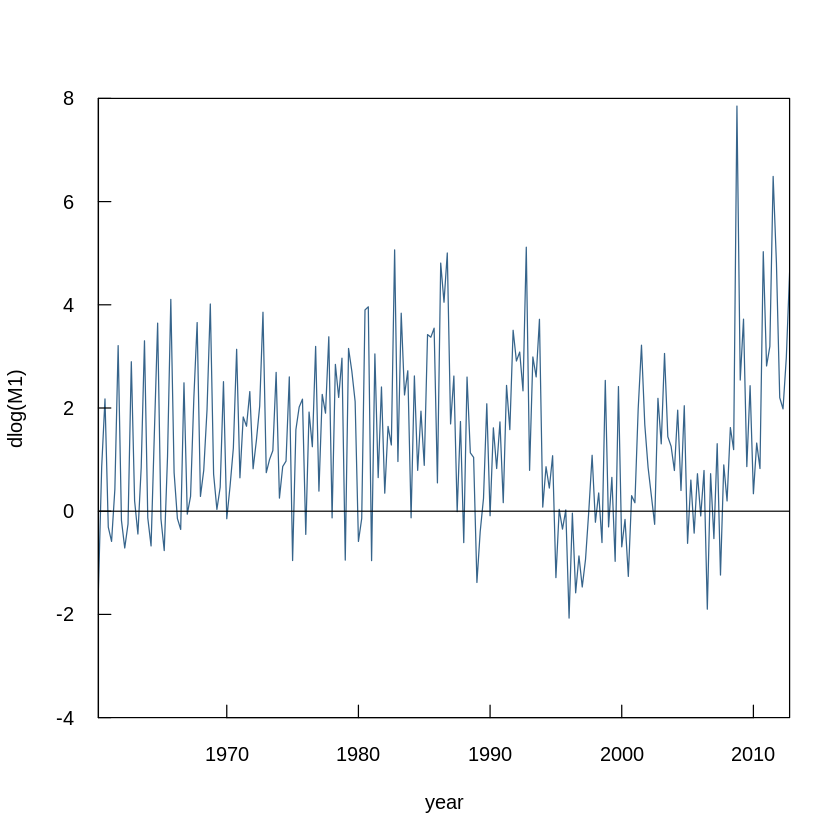

In [11]:
plot(data$DATE[-1],mg,type="l",las=1,xaxs="i",yaxs="i",xlab="year",ylab="dlog(M1)",main="",tck=0.02,col="steelblue4",ylim=c(-4,8))
abline(h=0)


Autocorrelations of series ‘mg’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.209  0.285  0.072  0.561 -0.006  0.140 -0.044  0.457 -0.131  0.025 
    11     12     13     14     15     16     17     18     19     20     21 
-0.090  0.344 -0.213 -0.019 -0.171  0.294 -0.236 -0.033 -0.189  0.274 -0.186 
    22     23     24     25 
 0.050 -0.085  0.313 -0.186 

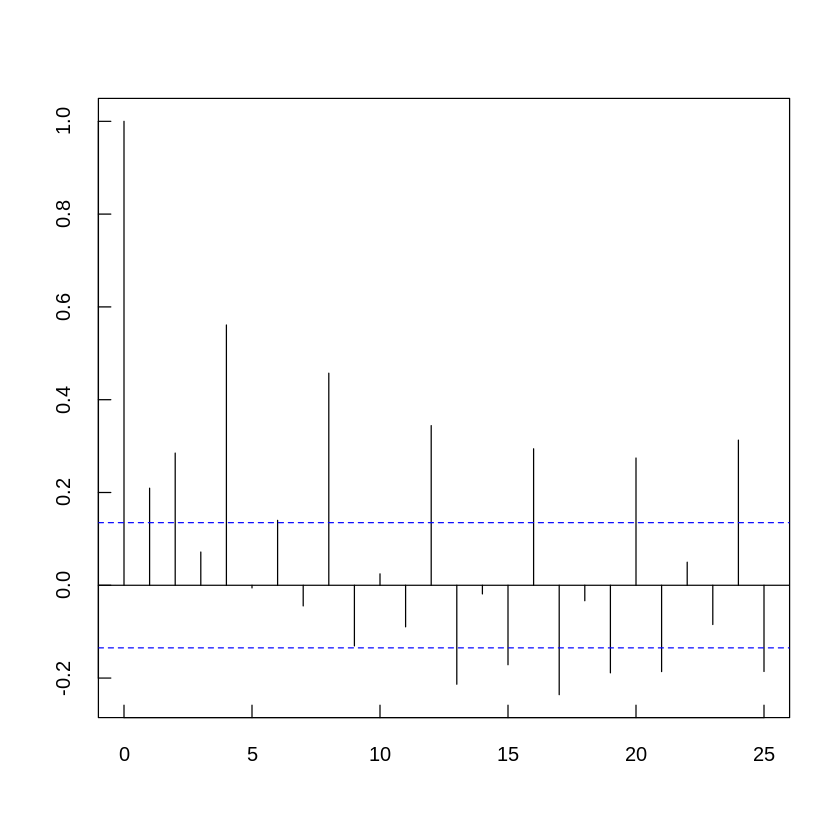


Partial autocorrelations of series ‘mg’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.209  0.252 -0.029  0.539 -0.306 -0.007 -0.002  0.261 -0.278 -0.048  0.104 
    12     13     14     15     16     17     18     19     20     21     22 
 0.032 -0.167  0.018 -0.054  0.102 -0.076 -0.005 -0.075  0.114  0.078  0.017 
    23     24     25 
 0.054 -0.003 -0.081 

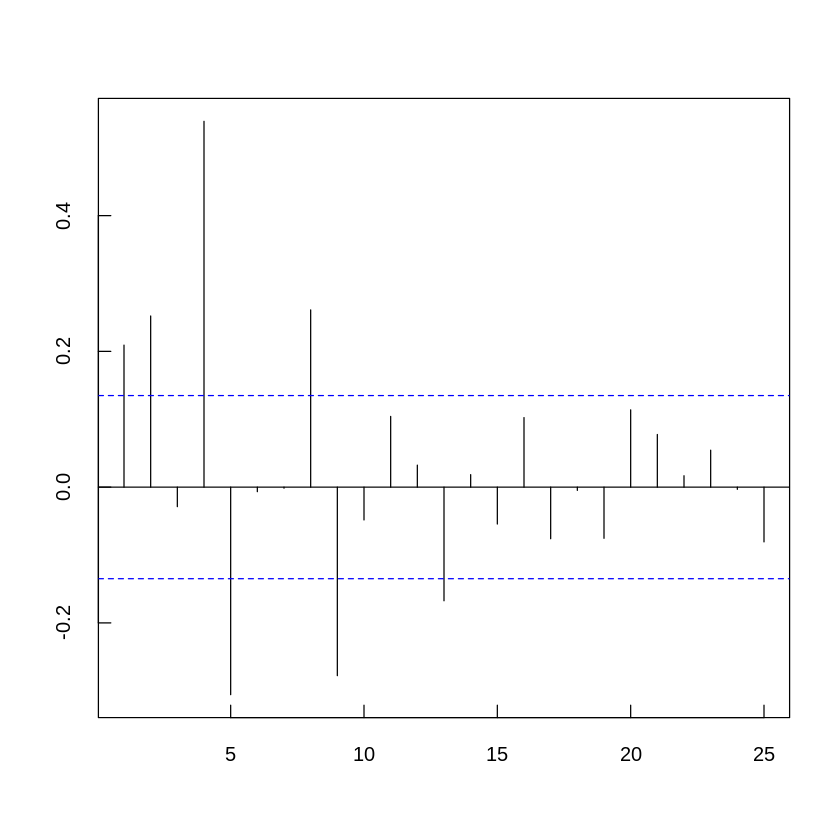

In [12]:
# - 8 b -
### PANEL A - без учета сезонности

acf.mg = acf(mg,lag=25,tck=.02,xlab="",ylab="",main="")
acf.mg
pacf.mg = pacf(mg,lag=25,tck=.02,xlab="",ylab="",main="")
pacf.mg

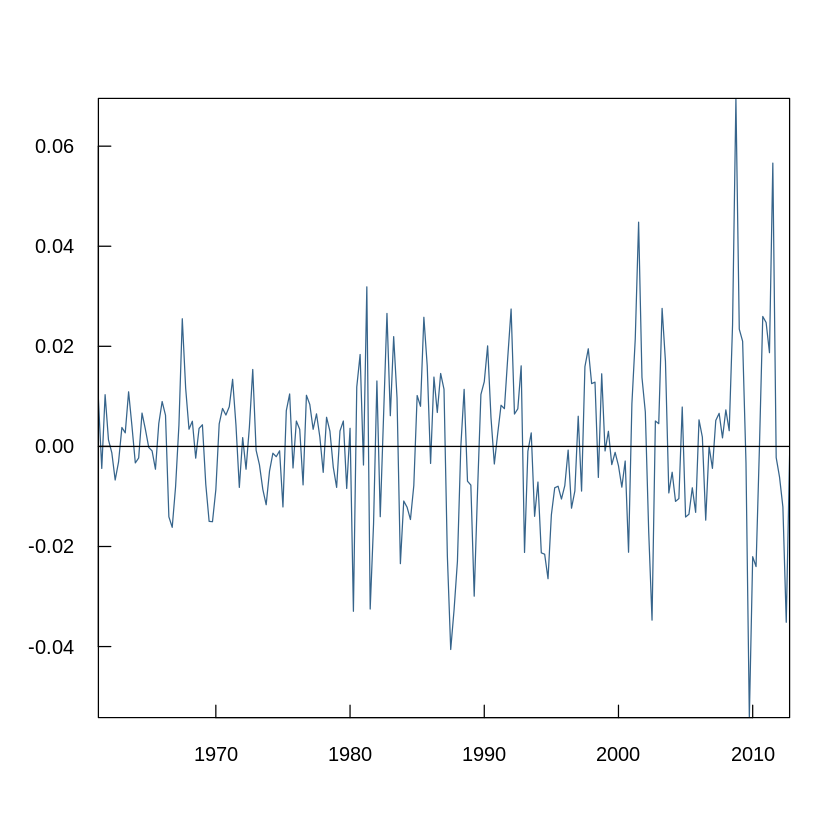


Autocorrelations of series ‘smg’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.412  0.159 -0.045 -0.416 -0.141 -0.033 -0.080  0.035 -0.003 -0.061 
    11     12     13     14     15     16     17     18     19     20     21 
 0.067 -0.065 -0.087 -0.062 -0.110 -0.069 -0.063 -0.081 -0.101 -0.012  0.077 
    22     23     24     25 
 0.106  0.135  0.040 -0.092 

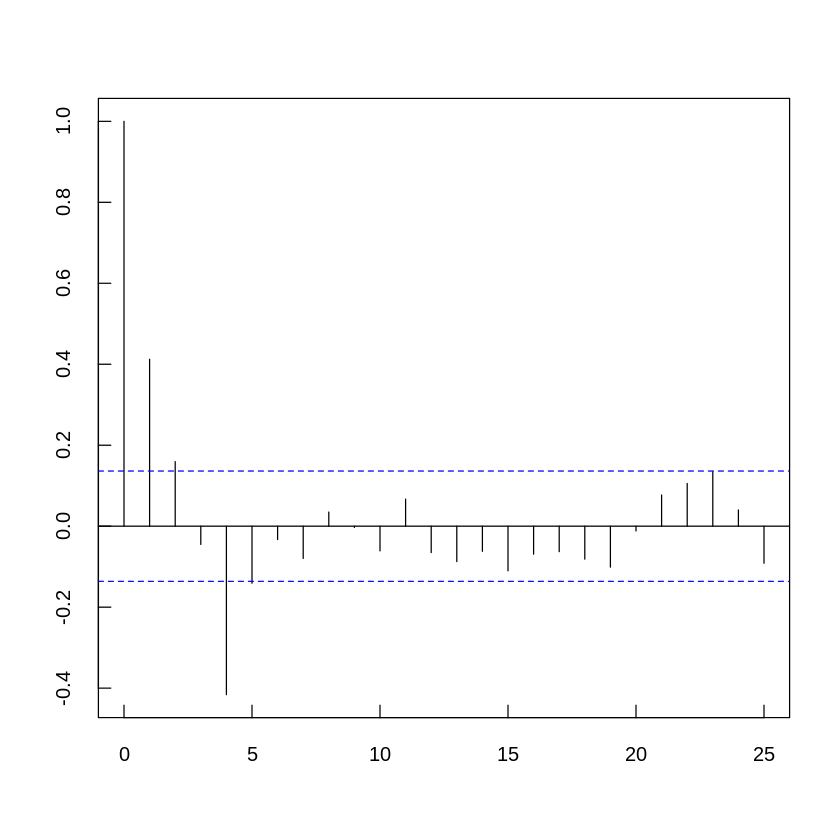


Partial autocorrelations of series ‘smg’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.412 -0.013 -0.128 -0.430  0.272  0.043 -0.200 -0.134  0.168 -0.033 -0.022 
    12     13     14     15     16     17     18     19     20     21     22 
-0.214  0.051 -0.039  0.006 -0.221 -0.054 -0.023 -0.089 -0.049  0.105 -0.048 
    23     24     25 
-0.033 -0.078 -0.059 

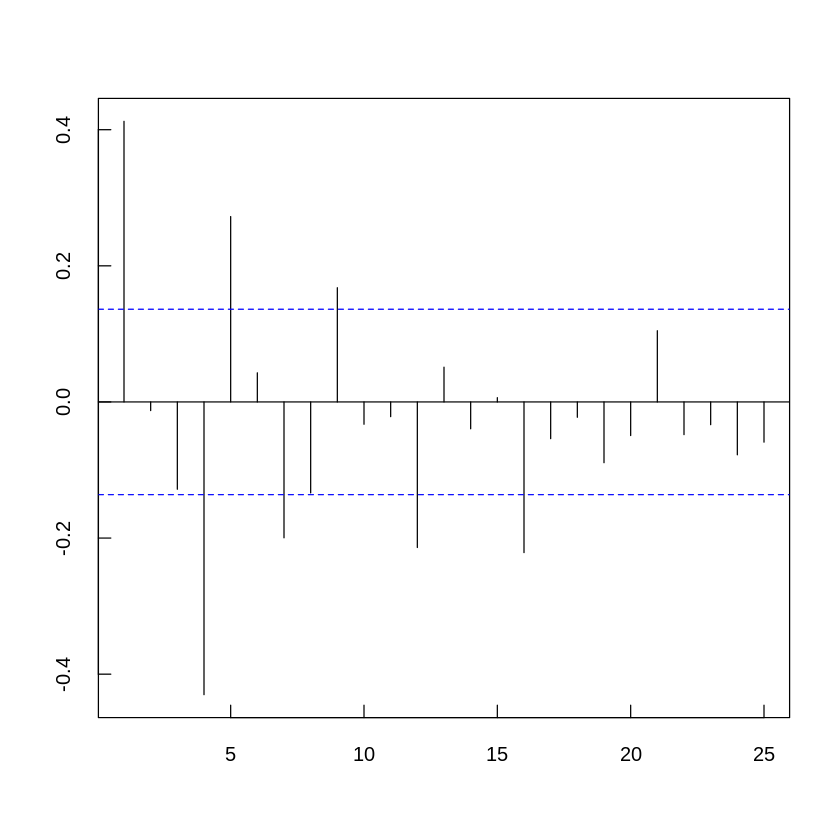

In [15]:
# - 8 c -
### PANEL B - с учетом сезонности

smg = diff(diff(log(data$M1NSA),4))
# добавили значения годов
plot(data$DATE[-c(1:5)],smg,type="l",las=1,xaxs="i",yaxs="i",xlab="",ylab="",main="",tck=0.02,col="steelblue4")
abline(h=0)

acf.mg = acf(smg,lag=25,tck=.02,xlab="",ylab="",main="")
acf.mg
pacf.mg = pacf(smg,lag=25,tck=.02,xlab="",ylab="",main="")
pacf.mg

In [18]:
install.packages("forecast")
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
install.packages("rugarch")
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [26]:
#spec.arma14 = arfimaspec(mean.model=list(armaOrder=c(4,4),include.mean=TRUE),
#                        fixed.pars=list(ar2=0,ar3=0,ar4=0,ma1=0,ma2=0,ma3=0))
spec.arma14 = arfimaspec(mean.model=list(armaOrder=c(1,4),include.mean=TRUE),
                         fixed.pars=list(ma1=0,ma2=0,ma3=0))
fit.arma14 = arfimafit(spec=spec.arma14,data=smg,solver="nlminb")
fit.arma14
res.arma14 = fit.arma14@fit$residuals
# Pval большой значит не отвергаем автокореллированность 
Box.test(res.arma14,lag=4,type="Ljung-Box")
Box.test(res.arma14,lag=8,type="Ljung-Box")
Box.test(res.arma14,lag=12,type="Ljung-Box")

Warning message in is.data.frame(data):
“restarting interrupted promise evaluation”
Warning message in is.data.frame(data):
“restarting interrupted promise evaluation”
Warning message in is.data.frame(data):
“restarting interrupted promise evaluation”
Warning message in is.data.frame(data):
“restarting interrupted promise evaluation”


ERROR: ignored

In [21]:
# - 9 -
##############################################
rm(list=ls()) 

data <- ts(read.csv("3 series.csv", header = TRUE),frequency = 1)

y <- ts(data[,"y"],  frequency=1)
x <- ts(data[,"x"],  frequency=1)
z <- ts(data[,"z"],  frequency=1)

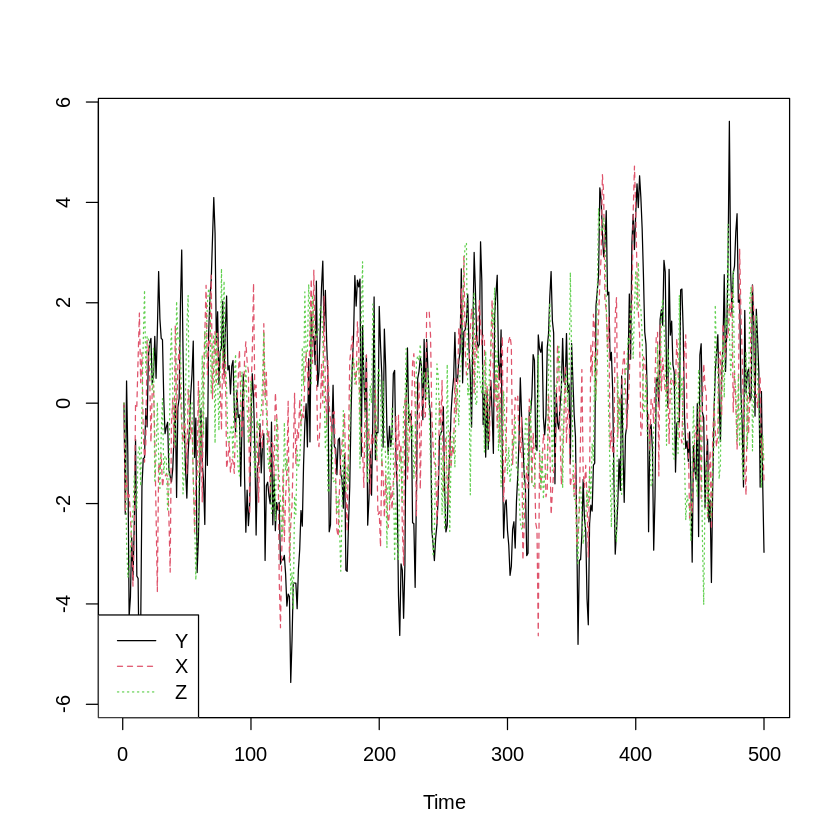

In [22]:
# - 9 a -
ts.plot(y,x,z, type="l", 
        lty=c(1,2,3), col=c(1,2,3))
legend("bottomleft", inset=c(0,0), border=NULL, legend=c("Y","X", "Z"), 
       lty=c(1,2,3), col=c(1,2,3))


In [23]:
# - 9 b -
#varmat <- as.matrix(cbind(data$x,data$y, data$z))
vary1 <- VAR(data, p=1)
summary(vary1)

#внутри единичного корная
roots(vary1, modulus = TRUE)


VAR Estimation Results:
Endogenous variables: x, y, z 
Deterministic variables: const 
Sample size: 499 
Log Likelihood: -2124.765 
Roots of the characteristic polynomial:
0.8392 0.5655 0.3301
Call:
VAR(y = data, p = 1)


Estimation results for equation x: 
x = x.l1 + y.l1 + z.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
x.l1   0.55108    0.03636  15.154  < 2e-16 ***
y.l1   0.01428    0.02797   0.510    0.610    
z.l1   0.23705    0.03721   6.371 4.31e-10 ***
const -0.03287    0.04517  -0.728    0.467    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9888 on 495 degrees of freedom
Multiple R-Squared: 0.5025,	Adjusted R-squared: 0.4995 
F-statistic: 166.7 on 3 and 495 DF,  p-value: < 2.2e-16 


Estimation results for equation y: 
y = x.l1 + y.l1 + z.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
x.l1  -0.01188    0.03739  -0.318    0.751    
y.l1   0.59590    0.02876  20.717   <2e-16 ***
z.l1   0.49122    0.0

[1] 0.8392060 0.5654662 0.3301067

In [24]:
# - 9 c -
causality(vary1, cause = "y")$Granger

# зависимоть одной переменной от других можно было бы проверить так
ols0 <- dynlm(x ~ L(y,1)  + L(x,1) + L(z,1), data = data)
stargazer(ols0, type = "text")

linearHypothesis(ols0, c("L(y, 1) = 0"), test="Chisq")

ols1 <- dynlm(y ~ L(y,1)  + L(x,1) + L(z,1), data = data)
stargazer(ols1, type = "text")

linearHypothesis(ols1, c("L(x, 1) = 0"  , "L(z, 1) = 0"), test="Chisq")


	Granger causality H0: y do not Granger-cause x z

data:  VAR object vary1
F-Test = 0.24106, df1 = 2, df2 = 1485, p-value = 0.7858



                        Dependent variable:    
                    ---------------------------
                                 x             
-----------------------------------------------
L(y, 1)                        0.014           
                              (0.028)          
                                               
L(x, 1)                      0.551***          
                              (0.036)          
                                               
L(z, 1)                      0.237***          
                              (0.037)          
                                               
Constant                      -0.033           
                              (0.045)          
                                               
-----------------------------------------------
Observations                    499            
R2                             0.503           
Adjusted R2                    0.500           
Residual Std. Error      0.989 (df = 49

,Res.Df,RSS,Df,Sum of Sq,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,496,484.2153,NA,NA,NA,NA
2,495,483.9606,1,0.2547285,0.260539,0.6097501



                        Dependent variable:    
                    ---------------------------
                                 y             
-----------------------------------------------
L(y, 1)                      0.596***          
                              (0.029)          
                                               
L(x, 1)                       -0.012           
                              (0.037)          
                                               
L(z, 1)                      0.491***          
                              (0.038)          
                                               
Constant                       0.032           
                              (0.046)          
                                               
-----------------------------------------------
Observations                    499            
R2                             0.727           
Adjusted R2                    0.726           
Residual Std. Error      1.017 (df = 49

,Res.Df,RSS,Df,Sum of Sq,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,497,694.4788,NA,NA,NA,NA
2,495,511.6337,2,182.8451,176.9006,3.859465e-39


In [27]:

# повтор для VAR(2)
vary2 <- VAR(data, p=2)
summary(vary2)

causality(vary2, cause = "y")$Granger

ols2 <- dynlm(y ~ L(y,1) + L(y, 2) + L(x,1) + L(x,2) + L(z,1)+ L(z,2), data = data)
stargazer(ols2, type = "text")

linearHypothesis(ols2, c("L(x, 1) = 0"  , "L(x, 2) = 0"), test="Chisq")



VAR Estimation Results:
Endogenous variables: x, y, z 
Deterministic variables: const 
Sample size: 498 
Log Likelihood: -2111.69 
Roots of the characteristic polynomial:
0.8435 0.6127 0.2551 0.2551 0.188 0.01996
Call:
VAR(y = data, p = 2)


Estimation results for equation x: 
x = x.l1 + y.l1 + z.l1 + x.l2 + y.l2 + z.l2 + const 

      Estimate Std. Error t value Pr(>|t|)    
x.l1   0.56032    0.04489  12.481  < 2e-16 ***
y.l1  -0.02849    0.04386  -0.650    0.516    
z.l1   0.23586    0.04397   5.364 1.26e-07 ***
x.l2  -0.03188    0.04542  -0.702    0.483    
y.l2   0.04733    0.03817   1.240    0.216    
z.l2   0.02364    0.05051   0.468    0.640    
const -0.02646    0.04521  -0.585    0.559    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9861 on 491 degrees of freedom
Multiple R-Squared: 0.5073,	Adjusted R-squared: 0.5013 
F-statistic: 84.26 on 6 and 491 DF,  p-value: < 2.2e-16 


Estimation results for equation y: 
y = x.l1 + y.


	Granger causality H0: y do not Granger-cause x z

data:  VAR object vary2
F-Test = 0.75189, df1 = 4, df2 = 1473, p-value = 0.5567



                        Dependent variable:    
                    ---------------------------
                                 y             
-----------------------------------------------
L(y, 1)                      0.555***          
                              (0.045)          
                                               
L(y, 2)                       0.081**          
                              (0.039)          
                                               
L(x, 1)                       -0.014           
                              (0.046)          
                                               
L(x, 2)                        0.012           
                              (0.046)          
                                               
L(z, 1)                      0.522***          
                              (0.045)          
                                               
L(z, 2)                       -0.074           
                              (0.052)  

,Res.Df,RSS,Df,Sum of Sq,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,493,499.4838,NA,NA,NA,NA
2,491,499.3831,2,0.1006316,0.09894229,0.9517326


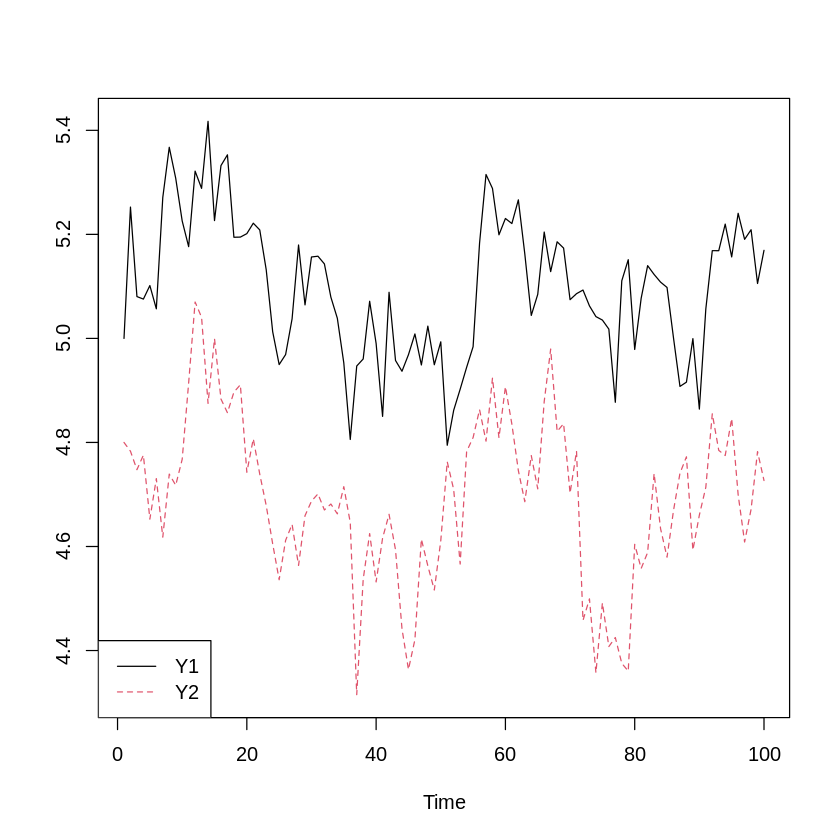

In [28]:
# - 10 -
#############################################################################

# Granger causality

rm(list=ls()) 

x <- read.csv("granger_caus1.csv", header = TRUE)
y1 <- ts(x[,"y1"],  frequency=1)
y2 <- ts(x[,"y2"],  frequency=1)

# - 10 a -
ts.plot(y1,y2, type="l", 
        lty=c(1,2), col=c(1,2))
legend("bottomleft", inset=c(0,0), border=NULL, legend=c("Y1","Y2"), 
       lty=c(1,2), col=c(1,2))


In [29]:


# - 10 b -
#adf.test(y1, k =1)
#adf.test(y2, k =1)

varmat <- as.matrix(cbind(y1,y2))
vary <- VAR(varmat)
summary(vary)

# VAR(p) стабильное, если все собственные числа матрицы A^(-1) по модулю меньше 1. 
#функция roots(), позволяет вычислить собственные числа матрицы A^(-1) 
#по умолчанию она выдает модули чисел.
roots(vary, modulus = TRUE)

# - 10 с -
# проверить свойства полученных ошибок
#serial.test(x, lags.pt = 16, lags.bg = 5, type = c("PT.asymptotic","PT.adjusted", "BG", "ES") )

#Portmanteau Autocorrelation Test (extended Ljung-Box)
serial.test(vary, lags.pt = 12, type = "PT.asymptotic" )

#Autocorrelation Breusch-Godfrey LM Test
serial.test(vary, lags.pt = 12, type = "BG" )


#Normality Test
normality.test(vary, multivariate.only = TRUE)

# - 10 d -
# Выбрать оптимальную VAR
# Можно выбрать оптимальную VAR командой
#VARselect(y, lag.max = 10, type = c("const", "trend", "both", "none"), season = NULL, exogen = NULL)
VARselect(varmat, lag.max = 10, type = "const", season = NULL, exogen = NULL)

# - 10 e -
#Причинность по Грейджеру для каждого уравнения в отдельности
ols1 <- dynlm(y1 ~ L(y1,1) + L(y2, 1) )
summary(ols1)


VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: const 
Sample size: 99 
Log Likelihood: 194.248 
Roots of the characteristic polynomial:
0.8617 0.3432
Call:
VAR(y = varmat)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.56569    0.07717   7.330 7.22e-11 ***
y2.l1  0.25117    0.06552   3.833 0.000226 ***
const  1.03741    0.34958   2.968 0.003789 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.08627 on 96 degrees of freedom
Multiple R-Squared: 0.5851,	Adjusted R-squared: 0.5764 
F-statistic: 67.69 on 2 and 96 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.26220    0.08801   2.979  0.00366 ** 
y2.l1  0.63916    0.07473   8.553 1.89e-13 ***
const  0.35553    0.39869   0.892  0.37475    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

[1] 0.8616656 0.3431813


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vary
Chi-squared = 30.919, df = 44, p-value = 0.9319

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vary
Chi-squared = 30.919, df = 44, p-value = 0.9319




	Breusch-Godfrey LM test

data:  Residuals of VAR object vary
Chi-squared = 16.099, df = 20, p-value = 0.7105

$serial

	Breusch-Godfrey LM test

data:  Residuals of VAR object vary
Chi-squared = 16.099, df = 20, p-value = 0.7105



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.72254, df = 4, p-value = 0.9485


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.68674, df = 2, p-value = 0.7094


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.035792, df = 2, p-value = 0.9823


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.72254, df = 4, p-value = 0.9485


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.68674, df = 2, p-value = 0.7094


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vary
Chi-squared = 0.035792, df = 2, p-value = 0.9823




,1,2,3,4,5,6,7,8,9,10
AIC(n),-9.505974e+00,-9.426308e+00,-9.354111e+00,-9.2705605864,-9.277004e+00,-9.231419e+00,-9.1784445687,-9.1250236727,-9.0419130289,-9.0829201650
HQ(n),-9.438770e+00,-9.314301e+00,-9.197300e+00,-9.0689465462,-9.030587e+00,-8.940199e+00,-8.8424211684,-8.7441971524,-8.6162833885,-8.6124874046
SC(n),-9.339321e+00,-9.148552e+00,-8.965251e+00,-8.7705986523,-8.665940e+00,-8.509252e+00,-8.3451746786,-8.1806511306,-7.9864378347,-7.9163423188
FPE(n),7.440964e-05,8.059456e-05,8.666323e-05,0.0000942821,9.378104e-05,9.831342e-05,0.0001038912,0.0001099109,0.0001198797,0.0001155964



Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = y1 ~ L(y1, 1) + L(y2, 1))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.225656 -0.055265 -0.005471  0.053995  0.202894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.03741    0.34958   2.968 0.003789 ** 
L(y1, 1)     0.56569    0.07717   7.330 7.22e-11 ***
L(y2, 1)     0.25117    0.06552   3.833 0.000226 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08627 on 96 degrees of freedom
Multiple R-squared:  0.5851,	Adjusted R-squared:  0.5764 
F-statistic: 67.69 on 2 and 96 DF,  p-value: < 2.2e-16


In [30]:

library(stargazer)
stargazer(ols1, type = "text")

ols2 <- dynlm(y2 ~ L(y1,1) + L(y2, 1) )
stargazer(ols2, type = "text")


                        Dependent variable:    
                    ---------------------------
                                y1             
-----------------------------------------------
L(y1, 1)                     0.566***          
                              (0.077)          
                                               
L(y2, 1)                     0.251***          
                              (0.066)          
                                               
Constant                     1.037***          
                              (0.350)          
                                               
-----------------------------------------------
Observations                    99             
R2                             0.585           
Adjusted R2                    0.576           
Residual Std. Error       0.086 (df = 96)      
F Statistic           67.689*** (df = 2; 96)   
Note:               *p<0.1; **p<0.05; ***p<0.01

                        Dependent vari

In [31]:
summary(vary)


VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: const 
Sample size: 99 
Log Likelihood: 194.248 
Roots of the characteristic polynomial:
0.8617 0.3432
Call:
VAR(y = varmat)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.56569    0.07717   7.330 7.22e-11 ***
y2.l1  0.25117    0.06552   3.833 0.000226 ***
const  1.03741    0.34958   2.968 0.003789 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.08627 on 96 degrees of freedom
Multiple R-Squared: 0.5851,	Adjusted R-squared: 0.5764 
F-statistic: 67.69 on 2 and 96 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.26220    0.08801   2.979  0.00366 ** 
y2.l1  0.63916    0.07473   8.553 1.89e-13 ***
const  0.35553    0.39869   0.892  0.37475    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

In [32]:
# Модель соответствует 2 регрессиям с разными зависимыми переменными 
# и идентичными объясняющими переменными. 
# Мы могли бы оценить эту модель, используя обычную оценку наименьших квадратов (OLS), 
# вычисляемую отдельно для каждого уравнения.
# Использование обобщенной оценки наименьших квадратов не приводит к повышению эффективности, 
# когда каждое уравнение содержит одни и те же объясняющие переменные.


#causality(x, cause = NULL, vcov.=NULL, boot=FALSE, boot.runs=100)
causality(vary, cause = "y1")$Granger
causality(vary, cause = "y2")$Granger


	Granger causality H0: y1 do not Granger-cause y2

data:  VAR object vary
F-Test = 8.8749, df1 = 1, df2 = 192, p-value = 0.003265



	Granger causality H0: y2 do not Granger-cause y1

data:  VAR object vary
F-Test = 14.695, df1 = 1, df2 = 192, p-value = 0.0001712


In [34]:
# - 11 -
###################################################################
rm(list=ls()) 

data <- read.csv("2independentwalks.csv", header = TRUE)

y1 <-ts(data[,"y1"], start = 1, frequency = 1)
y2 <-ts(data[,"y2"], start = 1, frequency = 1)

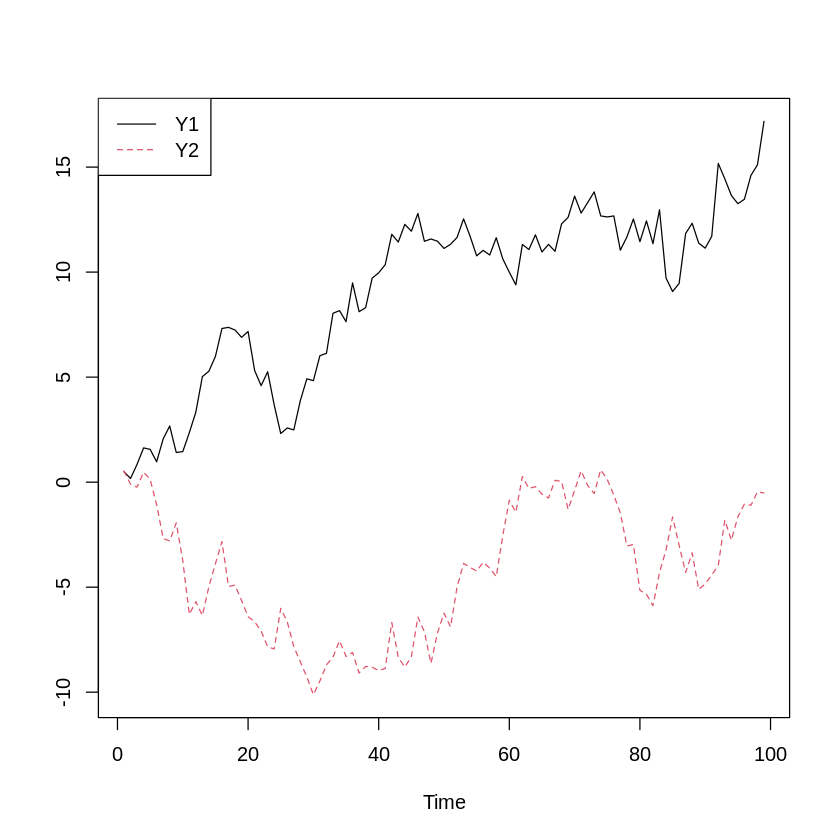

In [35]:

# - 11 a -
ts.plot(y1,y2, type="l", 
        lty=c(1,2), col=c(1,2))
legend("topleft", border=NULL, legend=c("Y1","Y2"), 
       lty=c(1,2), col=c(1,2))

In [36]:

# - 11 b -
varmat <- as.matrix(cbind(y1,y2))

vary1 <- VAR(varmat)
summary(vary1)

roots(vary1, modulus = TRUE)


VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: const 
Sample size: 98 
Log Likelihood: -279.174 
Roots of the characteristic polynomial:
0.946 0.946
Call:
VAR(y = varmat)


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.96683    0.02597  37.235   <2e-16 ***
y2.l1 -0.01094    0.03373  -0.324    0.746    
const  0.42274    0.31268   1.352    0.180    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.026 on 95 degrees of freedom
Multiple R-Squared: 0.9374,	Adjusted R-squared: 0.9361 
F-statistic: 711.1 on 2 and 95 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.06275    0.02576   2.436  0.01671 *  
y2.l1  0.92485    0.03346  27.644  < 2e-16 ***
const -0.89836    0.31015  -2.897  0.00468 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

[1] 0.9459677 0.9459677

In [37]:


# - 11 c -
causality(vary1, cause = "y2")$Granger
causality(vary1, cause = "y1")$Granger



	Granger causality H0: y2 do not Granger-cause y1

data:  VAR object vary1
F-Test = 0.1052, df1 = 1, df2 = 190, p-value = 0.746



	Granger causality H0: y1 do not Granger-cause y2

data:  VAR object vary1
F-Test = 5.9352, df1 = 1, df2 = 190, p-value = 0.01576


In [38]:
# - 12 -
##########################################################################
#VAR
#Пример 13.3 из учебника Principles of Econometrics with  R
# https://bookdown.org/ccolonescu/RPoE4/vec-and-var-models.html#estimating-a-var-model
rm(list=ls()) 
fred <- read.csv("fred.csv", header = TRUE)
#data("fred", package="PoEdata")
fred <- ts(fred, start=c(1960,1),end=c(2009,4),frequency=4)


	Augmented Dickey-Fuller Test

data:  fred[, "c"]
Dickey-Fuller = -3.0972, Lag order = 4, p-value = 0.1166
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  fred[, "y"]
Dickey-Fuller = -2.5352, Lag order = 4, p-value = 0.3519
alternative hypothesis: stationary


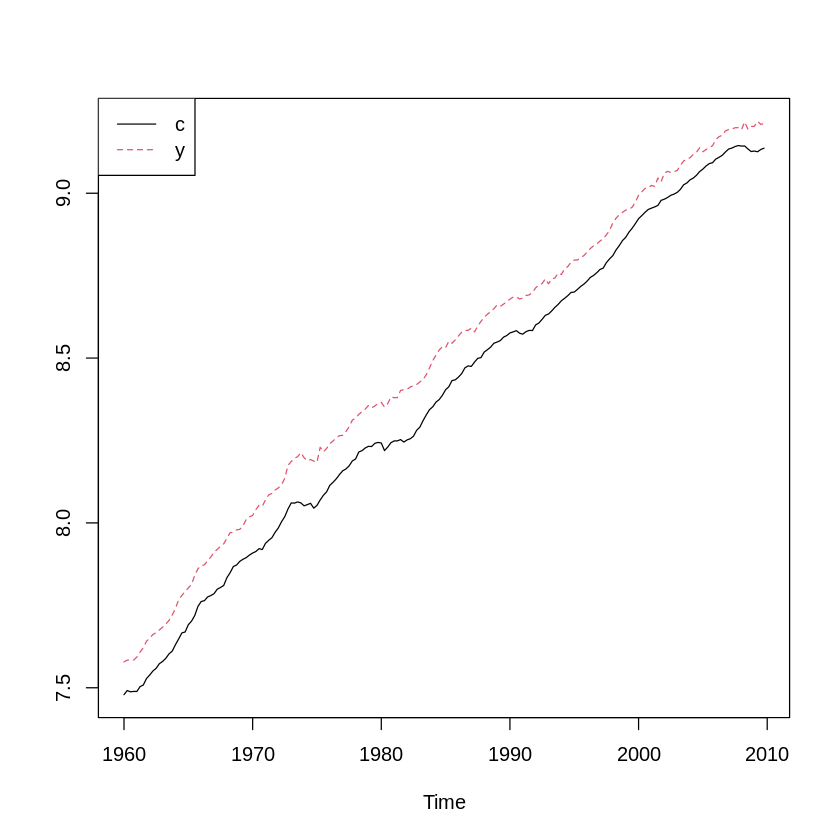

In [39]:
# - 12 a -
ts.plot(fred[,"c"],fred[,"y"], type="l", 
        lty=c(1,2), col=c(1,2))
legend("topleft", border=NULL, legend=c("c","y"), 
       lty=c(1,2), col=c(1,2))

# - 12 b -
#Acf(fred[,"c"])
#Acf(fred[,"y"])

#Dickey -Fuller
adf.test(fred[,"c"], k = 4)
adf.test(fred[,"y"], k = 4)

In [40]:
#Вывод - данные не отвергают нулевую гипотезу о том, что с и y следуют I(1)  

#Берем первую разность
adf.test(diff(fred[,"c"]), k = 4)

adf.test(diff(fred[,"y"]), k = 4)

#Обсуждение оптимального числа лагов опущено. 

Warning message in adf.test(diff(fred[, "c"]), k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(fred[, "c"])
Dickey-Fuller = -5.3767, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(fred[, "y"]), k = 4):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(fred[, "y"])
Dickey-Fuller = -6.8896, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


In [41]:
#Мoжно использовать команду ur.df() с автоматическим выбором числа лагов
ur.df(diff(fred[,"c"]), type = "none",  selectlags =  "AIC")
#The corresponding 10% critical value for the tests is −2.57



############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -3.3749 


In [42]:

# - 12 c -
#Проверка наличия коинтеграции. Включать константу "-1" или нет  - вопрос дискуссионный.
cointcy <- dynlm(c~y , data=fred)
summary(cointcy)
#Сохраняем ошибку из регрессии Consumption на Y (output) и проверяем стационарна ли она.
ehat <- resid(cointcy)


Time series regression with "ts" data:
Start = 1960(1), End = 2009(4)

Call:
dynlm(formula = c ~ y, data = fred)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051080 -0.012593  0.001981  0.015761  0.044331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.404163   0.025053  -16.13   <2e-16 ***
y            1.035288   0.002947  351.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01968 on 198 degrees of freedom
Multiple R-squared:  0.9984,	Adjusted R-squared:  0.9984 
F-statistic: 1.234e+05 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:


# Первый способ Dickey-Fuller - через ur.df() с автоматическим выбором числа лагов
ur.df(ehat,  type = "none", selectlags = "AIC")

#Для более подробной информации о тесте можно использовать команду summary
summary(ur.df(ehat,  type = "none", selectlags = "AIC"))
#H0 не отвергается

# Второй способ - проведение теста Dickey-Fuller "руками"
summary(dynlm(d(ehat)~L(ehat)))


# Первый способ даст ответ такой же как и во втором случае, если указать опцию lags = 0
ur.df(ehat, lags = 0, type = "none", selectlags = "AIC")

#Другие команды тестирующие на err на стационарность:
# adf.test также проводит тестирование Dickey-Fuller, но с опциями тренда и константы.
adf.test(ehat, k = 4)

# Phillips-Perron Unit Root Test
pp.test(ehat)

#Нет оснований отвергнуть H0: err~I(1), т.е. коинтеграции нет. 

# - 12 d -
#Оцениваем, используя VAR в разностях

#Создаем матрицу для оценки VAR
Dc <- diff(fred[,"c"])
Dy <- diff(fred[,"y"])
varmat <- as.matrix(cbind(Dc,Dy))

#Строим оценку VAR
varfit <- VAR(varmat) 
summary(varfit)


# - 13 -
#VEC
#Classical example
# https://bookdown.org/ccolonescu/RPoE4/vec-and-var-models.html#estimating-a-vec-model

# Чуть строже код для VEC моделей описан в
# https://www.econometrics-with-r.org/16-3-cointegration.html
rm(list=ls()) 
#data("gdp", package="PoEdata")
gdp <- read.csv("gdp.csv", header = TRUE)
gdp <- ts(gdp, start=c(1970,1), end=c(2000,4), frequency=4)

# - 13 a -
ts.plot(gdp[,"usa"],gdp[,"aus"], type="l", 
        lty=c(1,2), col=c(1,2))
legend("topleft", border=NULL, legend=c("USA","AUS"), 
       lty=c(1,2), col=c(1,2))

# - 13 b -
adf.test(gdp[,"usa"])
adf.test(gdp[,"aus"])

adf.test(diff(gdp[,"usa"]))
adf.test(diff(gdp[,"aus"]))

# - 13 c -
cint1.dyn <- dynlm(aus~usa - 1, data=gdp)
kable(tidy(cint1.dyn), digits=3,
      caption="The results of the cointegration equation 'cint1.dyn'")

ehat <- resid(cint1.dyn)


###################################################
#Повтор блока команд из предыдущего задания

# Первый способ Dickey-Fuller - через ur.df() с автоматическим выбором числа лагов
ur.df(ehat,  type = "none", selectlags = "AIC")

#Для более подробной информации о тесте можно использовать команду summary
summary(ur.df(ehat,  type = "none", selectlags = "AIC"))
#H0 отвергается

# Второй способ - проведение теста Dickey-Fuller "руками"
summary(dynlm(d(ehat)~L(ehat)))
#H0 отвергается

#Другие команды тестирующие на err на стационарность:
# adf.test также проводит тестирование Dickey-Fuller, но с опциями тренда и константы.
adf.test(ehat, k = 0)

# Phillips-Perron Unit Root Test с опциями тренда и константы.
pp.test(ehat)

#Два последних не отвергают H0, но они по умолчанию используют опции тренда и константы
#ur.df и прямое построение теста dickey_fuller предпочтительнее.
#Для adf.test критические значения p-value основаны на модели с дрифтом (константой), 
#для ur.df p-value указывается для модели без дрифта (константы) (при type = "none")
#для ur.df в модель можно добавить дрифт (type='drift')

#ВАЖНО: 
# a) ВВП обоих стран следуют: usa ~ I(1), aus ~ I(1),
# б) Ошибка из регрессии (aus = usa +err2 ) стационарна: err2 ~I(0)
# Есть коинтеграция рядов.

# - 13 d -
vecaus<- dynlm(d(aus)~L(ehat), data=gdp)
vecusa <- dynlm(d(usa)~L(ehat), data=gdp)
tidy(vecaus)

tidy(vecusa)

Du <- diff(gdp[,"usa"])
Da <- diff(gdp[,"aus"])
varmat <- as.matrix(cbind(Du,Da))
varfit <- VAR(varmat) 
summary(varfit)

In [ ]:
#5 Семинар

In [43]:
#############################################################
# - 14 -
#VEC or VAR?

rm(list=ls()) 

x = read.csv("gdprusdeu.csv", header = TRUE)

gdp <- ts(x, start=c(2003,1), end=c(2020,3), frequency=4)


In [45]:

# - 14 a -
dev.off()

null device 
          1

In [47]:

dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)


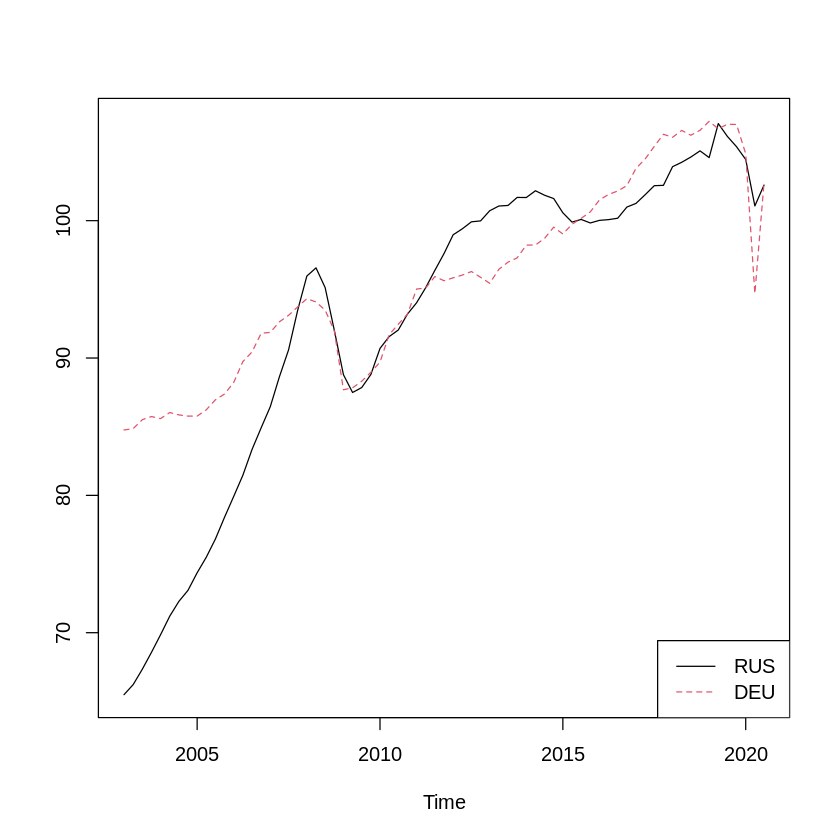

In [48]:

ts.plot(gdp[,"rus"],gdp[,"deu"], type="l", 
        lty=c(1,2), col=c(1,2))
legend("bottomright", border=NULL, legend=c("RUS","DEU"), 
       lty=c(1,2), col=c(1,2))

In [49]:


# - 14 b -
# единичный корень?
# для ВВП России
adf.test(gdp[,"rus"], k =1)
#summary(dynlm(diff(gdp[,"rus"]) ~ lag(gdp[,"rus"],-1) + time(gdp) + lag(diff(gdp[,"rus"]),-1)))

# учитывая, что это квартальные данные можно рассмотреть k =4 или использовать автовыбор лагов
adf.test(gdp[,"rus"], k =4)
summary(ur.df(gdp[,"rus"],  type = "trend", selectlags = "AIC"))
# нельзя отвергнуть гипотезу единичного корня

# для ВВП Германии
adf.test(gdp[,"deu"], k =1)
adf.test(gdp[,"deu"], k =4)
summary(ur.df(gdp[,"deu"],  type = "drift", selectlags = "AIC"))
# нельзя отвергнуть гипотезу единичного корня

# для приращений ВВП
adf.test(diff(gdp[,"rus"]), k = 1)
adf.test(diff(gdp[,"deu"]), k = 1)
# отвергаем гипотезу единичного корня для приращений
summary(ur.df(diff(gdp[,"rus"]),  type = "drift", selectlags = "AIC"))
summary(ur.df(diff(gdp[,"deu"]),  type = "drift", selectlags = "AIC"))

#Вывод: можно рассматривать ВВП двух стран как I(1)



	Augmented Dickey-Fuller Test

data:  gdp[, "rus"]
Dickey-Fuller = -2.3491, Lag order = 1, p-value = 0.4332
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  gdp[, "rus"]
Dickey-Fuller = -1.8964, Lag order = 4, p-value = 0.6174
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.13030 -0.42631  0.01896  0.51469  2.88763 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.99900    1.87833   2.661  0.00979 ** 
z.lag.1     -0.05879    0.02503  -2.349  0.02187 *  
tt           0.02022    0.01446   1.398  0.16680    
z.diff.lag   0.54456    0.10544   5.165 2.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9519 on 65 degrees of freedom
Multiple R-squared:  0.4114,	Adjusted R-squared:  0.3843 
F-statistic: 15.15 on 3 and 65 DF,  p-value: 1.405e-07


Value of test-statistic is: -2.3491 3.8392 4.1131 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6


	Augmented Dickey-Fuller Test

data:  gdp[, "deu"]
Dickey-Fuller = -2.2778, Lag order = 1, p-value = 0.4622
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  gdp[, "deu"]
Dickey-Fuller = -3.2279, Lag order = 4, p-value = 0.0904
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6194  -0.2644   0.2636   0.5364   5.1228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.45235    2.96897   1.500   0.1385  
z.lag.1     -0.04346    0.03097  -1.403   0.1652  
z.diff.lag  -0.25543    0.13956  -1.830   0.0717 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.753 on 66 degrees of freedom
Multiple R-squared:  0.07662,	Adjusted R-squared:  0.04864 
F-statistic: 2.738 on 2 and 66 DF,  p-value: 0.07204


Value of test-statistic is: -1.4032 1.9645 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



	Augmented Dickey-Fuller Test

data:  diff(gdp[, "rus"])
Dickey-Fuller = -3.6065, Lag order = 1, p-value = 0.03927
alternative hypothesis: stationary


Warning message in adf.test(diff(gdp[, "deu"]), k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(gdp[, "deu"])
Dickey-Fuller = -4.5933, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0194 -0.4204  0.1513  0.4560  3.1738 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.1944     0.1377   1.411  0.16287   
z.lag.1      -0.3798     0.1156  -3.284  0.00165 **
z.diff.lag   -0.1008     0.1494  -0.675  0.50221   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 65 degrees of freedom
Multiple R-squared:  0.2128,	Adjusted R-squared:  0.1886 
F-statistic: 8.785 on 2 and 65 DF,  p-value: 0.0004197


Value of test-statistic is: -3.2843 5.4006 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0635  -0.2660   0.2059   0.6135   5.0826 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2575     0.2301   1.119    0.267    
z.lag.1      -1.1641     0.2553  -4.560 2.32e-05 ***
z.diff.lag   -0.1304     0.2848  -0.458    0.649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 65 degrees of freedom
Multiple R-squared:  0.5476,	Adjusted R-squared:  0.5337 
F-statistic: 39.34 on 2 and 65 DF,  p-value: 6.371e-12


Value of test-statistic is: -4.5605 10.4559 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


In [51]:




# - 14 c -
# коинтеграция
cint1.dyn <- dynlm(rus~deu, data=gdp)
kable(tidy(cint1.dyn), digits=3,
      caption="The results of the cointegration equation 'cint1.dyn'")
# коэффициент в потенциальном коинтеграционном соотношении значим
ehat <- resid(cint1.dyn)
coint2.dyn <- dynlm(d(ehat)~L(ehat)-1)
# зависимость от лага (DF тест, сделанный руками) есть, т.е. ошибка стационарна
summary(coint2.dyn)
#  DF test с помощью встроенной команды
summary(ur.df(ehat,  type = "none", selectlags = "AIC"))
# можно отвергнуть H0 о наличии единичного корня у ошибки
# Замечание: данный результат крайне неустойчив к выбору числа лагов и type = none, trend, drift



Table: The results of the cointegration equation 'cint1.dyn'

|term        | estimate| std.error| statistic| p.value|
|:-----------|--------:|---------:|---------:|-------:|
|(Intercept) |  -49.099|     8.665|    -5.666|       0|
|deu         |    1.486|     0.090|    16.438|       0|


Time series regression with "ts" data:
Start = 2003(2), End = 2020(3)

Call:
dynlm(formula = d(ehat) ~ L(ehat) - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2949 -0.8128  0.0115  0.8961 11.4617 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)  
L(ehat) -0.12386    0.04885  -2.536   0.0135 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.131 on 69 degrees of freedom
Multiple R-squared:  0.08524,	Adjusted R-squared:  0.07198 
F-statistic: 6.429 on 1 and 69 DF,  p-value: 0.01349



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1136 -0.8172  0.2375  0.8027 12.3213 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.10931    0.04926  -2.219  0.02987 * 
z.diff.lag -0.36754    0.13585  -2.705  0.00864 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.051 on 67 degrees of freedom
Multiple R-squared:  0.1765,	Adjusted R-squared:  0.1519 
F-statistic: 7.178 on 2 and 67 DF,  p-value: 0.001498


Value of test-statistic is: -2.2192 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


In [52]:


# - 14 d -
# VAr or VEC ?
# Так как выявлена коинтеграция, то VEC

# Напомним: в VEC фактически вопрос может стоять только о том, 
# существует ли G причинность в выбранном направлении
# так как какая-то причинность есть по определению коинтеграции

# построим урезанную VEC, без лагов y
vecrus0<- dynlm(d(rus)~L(ehat), data=gdp)
vecdeu0 <- dynlm(d(deu)~L(ehat), data=gdp)
tidy(vecrus0)
# ВВП России связан с ВВП Германии в предыдущий период: 
# rus = 1.486*deu + e
# rus_t = -0.047*e_t-1 = -0.047*(rus_t-1 - 1.486*deu_t-1)=-0.047*(rus_t-1) +0.0698*(deu_t-1)
# долгосрочная G причинность в направлении от Германии к России

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.53071226,0.14195373,3.738628,0.0003816563
L(ehat),-0.04697611,0.02722232,-1.725647,0.0889528409


In [53]:
tidy(vecdeu0)
# ВВП Германии не связан с ВВП России в предыдущий период.
# Слово "зависит" экономически не совсем верное, 
# так как немецкий ВВП - скорее индикатор положения дел в мировой экономике

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.25619583,0.21235010,1.206478,0.2318137
L(ehat),0.05178152,0.04072216,1.271581,0.2078541


In [54]:



# построим НОРМАЛЬНУЮ VEC, с лагами y (проверьте, что вторые лаги уже незначимы)
vecrus<- dynlm(d(rus)~L(ehat) + L(d(rus)) + L(d(deu)), data=gdp)
vecdeu <- dynlm(d(deu)~L(ehat) + L(d(rus)) + L(d(deu)), data=gdp)
tidy(vecrus)
# теперь G причинности нет 
tidy(vecdeu)
# теперь есть кратносрочная G причинность

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.1995719,0.13223860,1.509181,1.360984e-01
L(ehat),-0.0192809,0.02448685,-0.787398,4.339108e-01
L(d(rus)),0.6892273,0.12442107,5.539474,5.889818e-07
L(d(deu)),-0.1696979,0.09840053,-1.724563,8.935896e-02


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.007263388,0.22531469,0.03223664,0.974382122
L(ehat),0.053989829,0.04172192,1.29403999,0.200230637
L(d(rus)),0.609800599,0.21199479,2.87648859,0.005433204
L(d(deu)),-0.502011206,0.16765970,-2.99422697,0.003888856


In [55]:


# VAR  в разностях для примера
Dr <- diff(gdp[,"rus"])
Dd <- diff(gdp[,"deu"])
varmat1 <- as.matrix(cbind(Dr,Dd))

varfit1 <- VAR(varmat1) 
summary(varfit1)


VAR Estimation Results:
Endogenous variables: Dr, Dd 
Deterministic variables: const 
Sample size: 69 
Log Likelihood: -213.439 
Roots of the characteristic polynomial:
0.6242 0.4513
Call:
VAR(y = varmat1)


Estimation results for equation Dr: 
Dr = Dr.l1 + Dd.l1 + const 

      Estimate Std. Error t value Pr(>|t|)    
Dr.l1  0.70312    0.12281   5.725 2.75e-07 ***
Dd.l1 -0.15961    0.09728  -1.641    0.106    
const  0.18748    0.13097   1.432    0.157    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9828 on 66 degrees of freedom
Multiple R-Squared: 0.3629,	Adjusted R-squared: 0.3436 
F-statistic:  18.8 on 2 and 66 DF,  p-value: 3.45e-07 


Estimation results for equation Dd: 
Dd = Dr.l1 + Dd.l1 + const 

      Estimate Std. Error t value Pr(>|t|)   
Dr.l1  0.57090    0.21092   2.707  0.00864 **
Dd.l1 -0.53026    0.16708  -3.174  0.00229 **
const  0.04112    0.22493   0.183  0.85550   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

In [57]:

# - 14 e - 
#IRF
impresp_RonD <- irf(varfit1,impulse = "Dr", response = "Dd", n.ahead = 10,
                    ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.95)


png 
  3

In [58]:
dev.off()


png 
  3

In [59]:
dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)


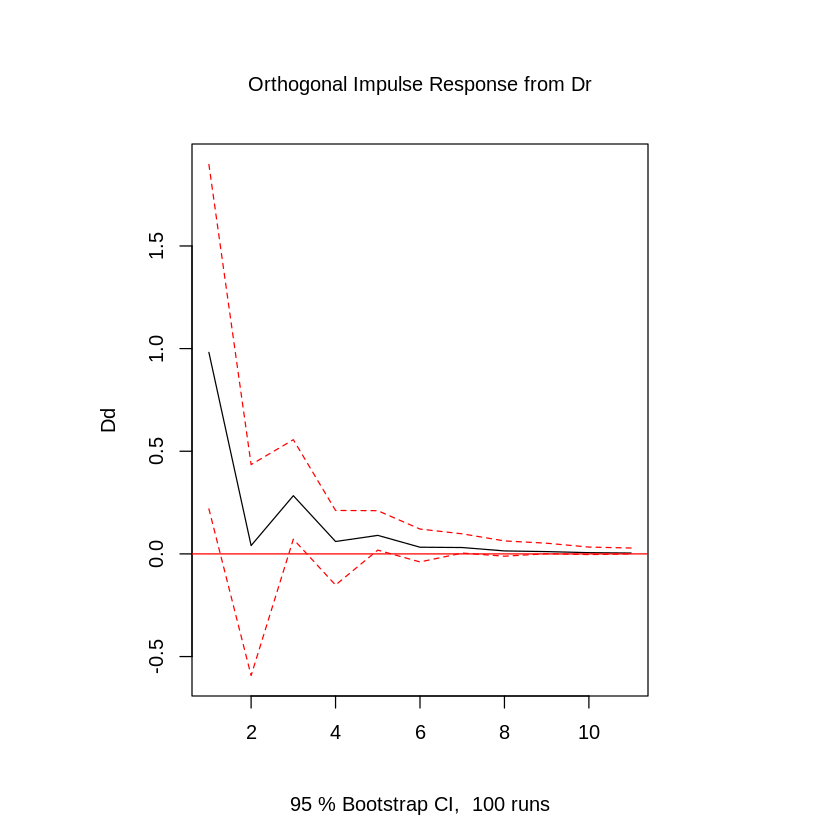

In [60]:
plot(impresp_RonD)

In [62]:
impresp_RonR <- irf(varfit1,impulse = "Dr", response = "Dr", n.ahead = 10,
                    ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.95)


In [63]:
dev.off()


png 
  3

In [64]:
dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)


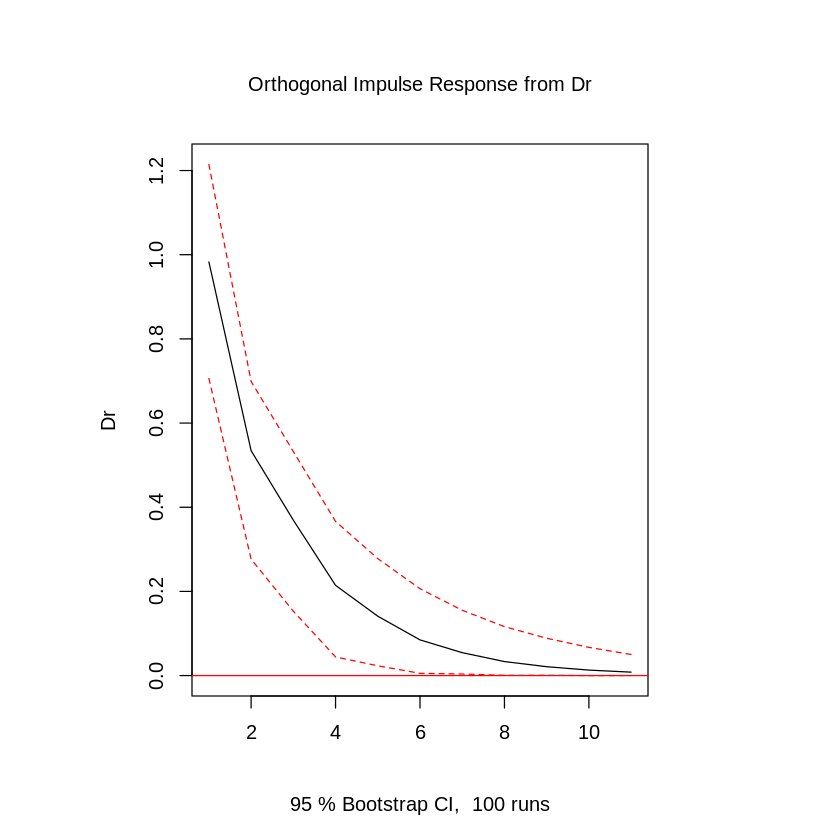

In [65]:
plot(impresp_RonR)

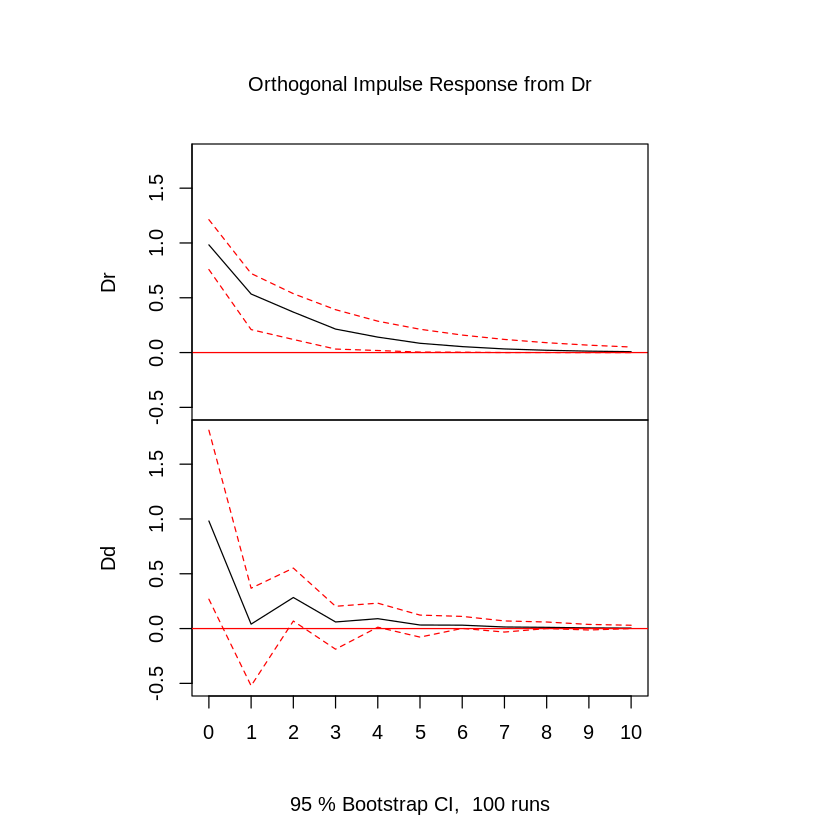

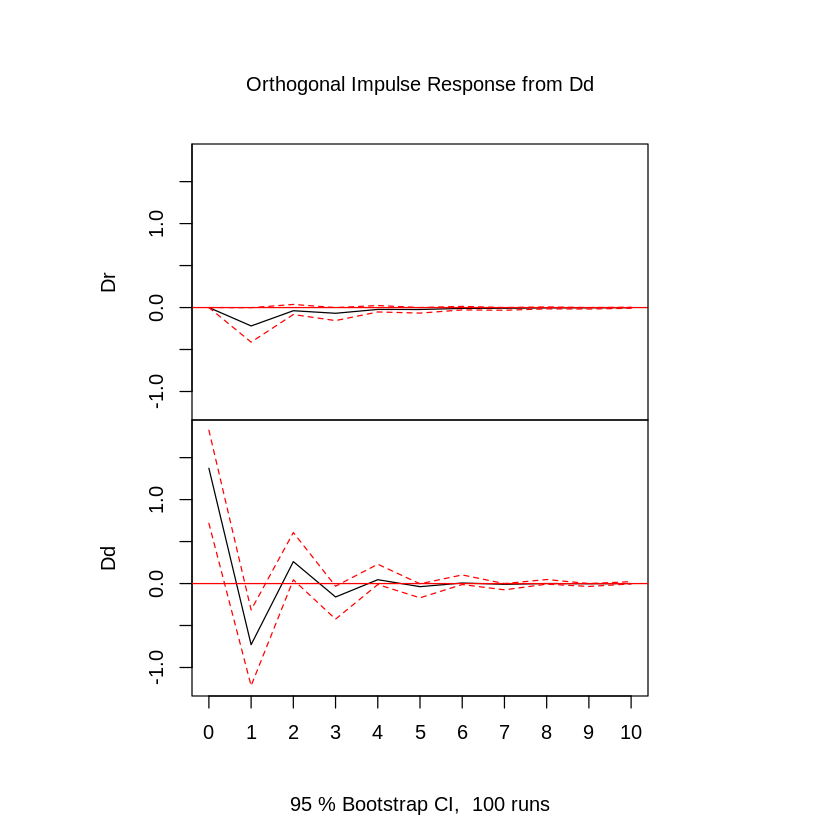

In [68]:
#dev.off()

impresp_1 <- irf(varfit1, n.ahead = 10,
                 ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.95)

plot(impresp_1)



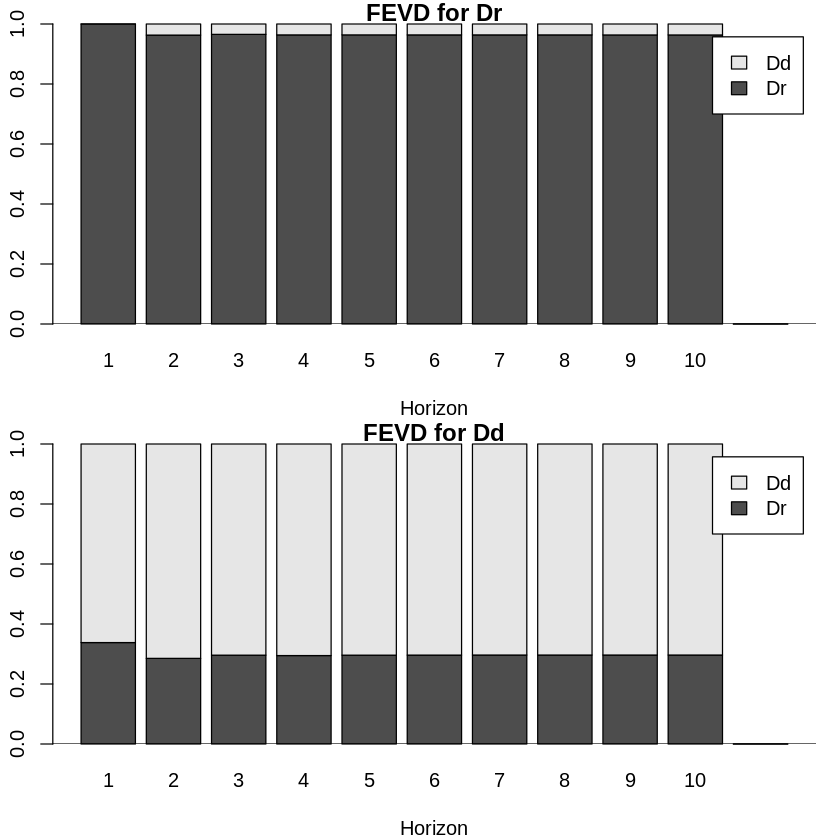

In [72]:
# Декомпозиция ошибок прогноза
par(mfrow = c(1, 1), mar = c(4, 2.2, 1, 1), cex = 1.6)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(fevd(varfit1))

In [ ]:
############################################################################
# - 15 - 
# Причинность

rm(list=ls()) 
x <- ts(read.csv("pinkham.csv", header = TRUE), start=c(1908), end=c(1960), frequency=1)

# - 15 a - 
dev.off()
dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(x[,"adver"],x[,"inc"],x[,"sales"], type="l", col=c(1,2,3))
legend("topleft", border=NULL, legend=c("advert","inc","sales"), lty=c(1,1,1), col=c(1,2,3))

# - 15 b -
# I(1)?
# ur.df проводит тестирование Dickey-Fuller
summary(ur.df(x[,"adver"],  type = "drift", selectlags = "AIC"))
adf.test(x[,"adver"])
summary(ur.df(x[,"sales"],  type = "drift", selectlags = "AIC"))
#Не отвергаем H0



#Проверка наличия коинтеграции. Включать константу "-1" или нет  - вопрос дискуссионный.
cointcy <- dynlm(sales ~ adver , data=x)
summary(cointcy)
#Сохраняем ошибку из регрессии (sales ~ adver) и проверяем стационарна ли она.
ehat <- resid(cointcy)

# Первый способ Dickey-Fuller - через ur.df() с автоматическим выбором числа лагов
summary(ur.df(ehat,  type = "none", selectlags = "AIC"))
#H0 отвергается

# Второй способ - проведение теста Dickey-Fuller "руками"
summary(dynlm(d(ehat)~L(ehat)))
#H0 отвергается

#Другие команды тестирующие на err на стационарность:
# adf.test также проводит тестирование Dickey-Fuller, но с опциями тренда и константы.
adf.test(ehat, k = 0)
# Phillips-Perron Unit Root Test
pp.test(ehat)
#H0 отвергается


#ИТОГ: 
# a) adver и sales следуют I(1),
# б) Ошибка из регрессии (adver~sales ) стационарна: err ~I(0)
# Есть коинтеграция рядов.



# - 15 c -
# VEC (ECM)
# построим урезанную VEC, без лагов y
vecA<- dynlm(d(adver)~L(ehat), data=x)
vecS <- dynlm(d(sales)~L(ehat), data=x)

tidy(vecA)
tidy(vecS)
#Долгосрочная G-причинность от Продаж к Рекламе

# построим  VEC с лагами y 
vecA2 <- dynlm(d(adver)~L(ehat) + L(d(adver)) + L(d(sales)), data=x)
tidy(vecA2)
vecS2 <- dynlm(d(sales)~L(ehat) + L(d(adver)) + L(d(sales)), data=x)
tidy(vecS2)
#Долгосрочная G-причинность от Продаж к Рекламе
#Краткосрочной причинности нет


# замечание: тест на причинность зависит от формы контеграционного соотношения z1 или z2
# adver = b1* sales + z1  и sales = b2*adver + z2
ehatal <- resid(dynlm( adver ~ sales, data=x))

vecA2al <- dynlm(d(adver)~L(ehatal) + L(d(adver)) + L(d(sales)), data=x)
tidy(vecA2al)
vecS2al <- dynlm(d(sales)~L(ehatal) + L(d(adver)) + L(d(sales)), data=x)
tidy(vecS2al)
#Долгосрочная G-причинность от Продаж к Рекламе и от Рекламы к Продажам


# - 15 d -
#Возвращаемся к изначальной VEC

# Добавляем Income в рассмотрение
summary(ur.df(x[,"inc"],  type = "drift", selectlags = "AIC"))
summary(ur.df(diff(x[,"inc"]),  type = "drift", selectlags = "AIC"))
# inc ~I(1)

#коинтеграция?
ehat1 <- resid(dynlm(adver ~ sales , data=x))
summary(ur.df(ehat1,  type = "none", selectlags = "AIC"))

ehat2 <- resid(dynlm(sales ~ adver + inc, data=x))
summary(ur.df(ehat2,  type = "none", selectlags = "AIC"))


#VEC
#Долгосрочная и краткосрочная причинность
# ehat1 = adver - beta*sales - gamma*inc 
summary(dynlm(adver ~ sales + inc, data=x))

# число лагов выбрано методом отбрасывания незначимых
vecA3 <- dynlm(d(adver)~ L(ehat1) +L(ehat2)+ L(d(adver)) + L(d(sales))+ L(d(inc)), data=x)
summary(vecA3)
#Долгосрочная G-причинность от Продаж к Рекламе 

vecS3 <- dynlm(d(sales)~ L(ehat1) +L(ehat2) + L(d(adver)) + L(d(sales))+ L(d(inc)), data=x)
summary(vecS3)
#Долгосрочная G-причинность от Рекламы к Продажам

# если учитывать только одно коинтеграционное соотношение
# ehat2 = sales - beta*adver - gamma*inc 
summary(dynlm( sales~adver  + inc, data=x))
vecA4 <- dynlm(d(adver)~ L(ehat2) + L(d(adver)) + L(d(sales))+ L(d(inc)), data=x)
summary(vecA4)
#Долгосрочная G-причинность от Продаж к Рекламе 
vecS4 <- dynlm(d(sales)~ L(ehat2) + L(d(adver)) + L(d(sales))+ L(d(inc)), data=x)
summary(vecS4)
# Нет долгосрочной G-причинности от Рекламы к Продажам 

#VAR - иллюстрация
#Выбор числа лагов
varmat <- as.matrix(cbind(x[,"adver"],x[,"inc"],x[,"sales"]))

VARselect(varmat, lag.max = 6, type = "trend")

VARp3 <-VAR(varmat, p = 3)

summary(VARp3)
#Гипотеза об одновременном равенстве нулю коэффициентов при запаздывающих на 1 и 2 шага значениях
#переменной Adver в уравнении для Sales отвергается. 
#Аналогично для Sales в уравнении для Adver 
#Cвязь между этими переменными в обоих направлениях.




In [73]:
############################################################################
# - 16 - 
# SVAR

rm(list=ls()) 

x <- read.csv("svar.csv", header = TRUE)

eps1 <- ts(x[,"eps1"], frequency=1)
eps2 <- ts(x[,"eps2"], frequency=1)
y1 <- ts(x[,"y1"], frequency=1)
y2 <- ts(x[,"y2"], frequency=1)

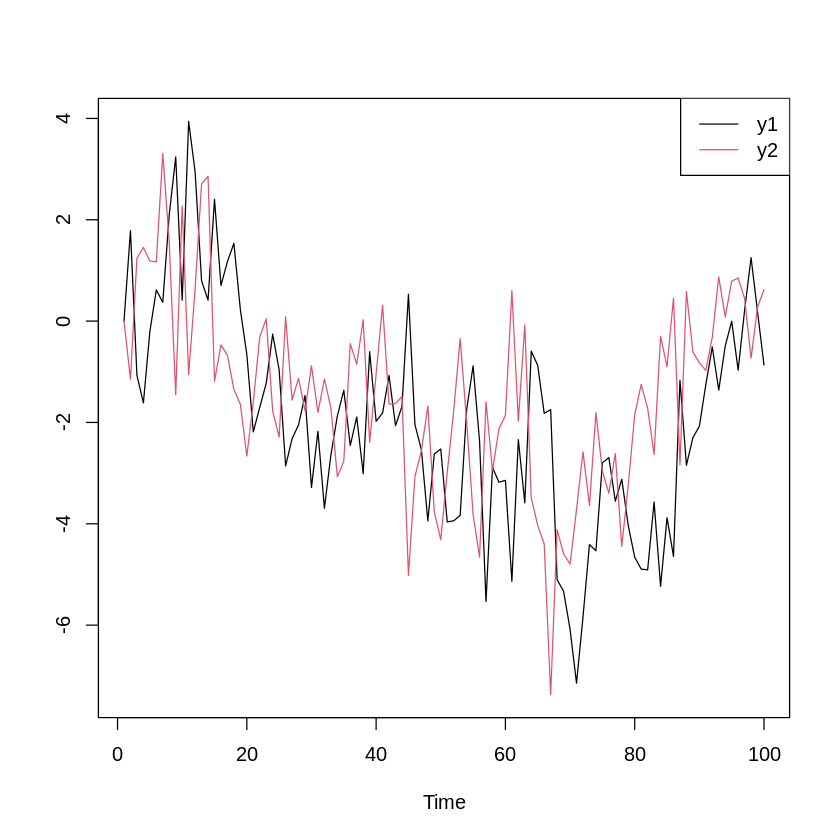

In [74]:


# - 16 a -
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(y1,y2, type="l", col=c(1,2))
legend("topright", border=NULL, legend=c("y1","y2"), lty=c(1,1), col=c(1,2))


In [75]:

# - 16 b -
# при создании матрицы в данном случае важен порядок включения векторов y1 и y2
varmat <- as.matrix(cbind(y1,y2))


# Задание первого и второго упорядочивания
# Нужно в явном виде задать матрицы А и B: 
# Ay(t) = Cy(t-1) + Be(t)
#
# A =  1   0
#      NA  1

# B =  NA  0
#      0  NA

# Создаем матрицу А

a1 <- diag(2)
diag(a1) <- 1
a1[2, 1] <- NA
print(a1)

     [,1] [,2]
[1,]    1    0
[2,]   NA    1


In [76]:

# Создаем матрицу B для первого упорядочения 

b1 <- diag(2)
diag(b1) <- NA
print(b1)


     [,1] [,2]
[1,]   NA    0
[2,]    0   NA


In [77]:

# - 16 c -
#Перед оценкой SAVR необходимо построить обычную VAR

# выбор числа лагов
VARselect(varmat, lag.max = 10, type = "none")
# p= 1


var1 <- VAR(varmat, p = 1, type = "none")
summary(var1)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-0.2221694,-0.16174382,-0.1382573,-0.1104109,-0.04806703,0.03009284,0.08337175,0.1512115,0.1011361,0.07521226
HQ(n),-0.1773662,-0.07213758,-0.0038479,0.0688016,0.17594857,0.29891156,0.39699359,0.5096365,0.5043642,0.52324346
SC(n),-0.1110667,0.06046148,0.1950507,0.3339997,0.50744623,0.69670876,0.86109031,1.0400328,1.1010600,1.18623878
FPE(n),0.8007915,0.85075880,0.8712197,0.8963091,0.95482770,1.03384771,1.09249562,1.1721603,1.1185871,1.09449560



VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: none 
Sample size: 99 
Log Likelihood: -268.637 
Roots of the characteristic polynomial:
0.9719 0.1848
Call:
VAR(y = varmat, p = 1, type = "none")


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.60404    0.04246   14.23   <2e-16 ***
y2.l1  0.53724    0.05128   10.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.9575 on 97 degrees of freedom
Multiple R-Squared: 0.8907,	Adjusted R-squared: 0.8884 
F-statistic: 395.2 on 2 and 97 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.28702    0.06203   4.627 1.15e-05 ***
y2.l1  0.55269    0.07492   7.377 5.51e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.399 on 97 degrees of freedom
Multiple

In [78]:
#SVAR(объект получнный командой VAR, estmethod = c("scoring", "direct"), Amat = NULL, Bmat = NULL,
#     start = NULL, max.iter = 100, conv.crit = 1e-07, maxls = 1,
#     lrtest = TRUE, ...)

svar1 <- SVAR(var1, estmethod = "direct", Amat = a1, 
              Bmat = b1, max.iter = 100)


Warning message in SVAR(var1, estmethod = "direct", Amat = a1, Bmat = b1, max.iter = 100):
“The AB-model is just identified. No test possible.”


In [80]:


# - 16 d -
summary(svar1)



SVAR Estimation Results:

Call:
SVAR(x = var1, estmethod = "direct", Amat = a1, Bmat = b1, max.iter = 100)

Type: AB-model 
Sample size: 99 
Log Likelihood: -270.682 
Method: direct 
Number of iterations: 154 
Convergence code: 0 

Estimated A matrix:
      y1 y2
y1 1.000  0
y2 1.081  1

Estimated B matrix:
      y1    y2
y1 0.958 0.000
y2 0.000 0.941

Covariance matrix of reduced form residuals (*100):
       y1     y2
y1  91.77 -99.23
y2 -99.23 195.85

Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod =

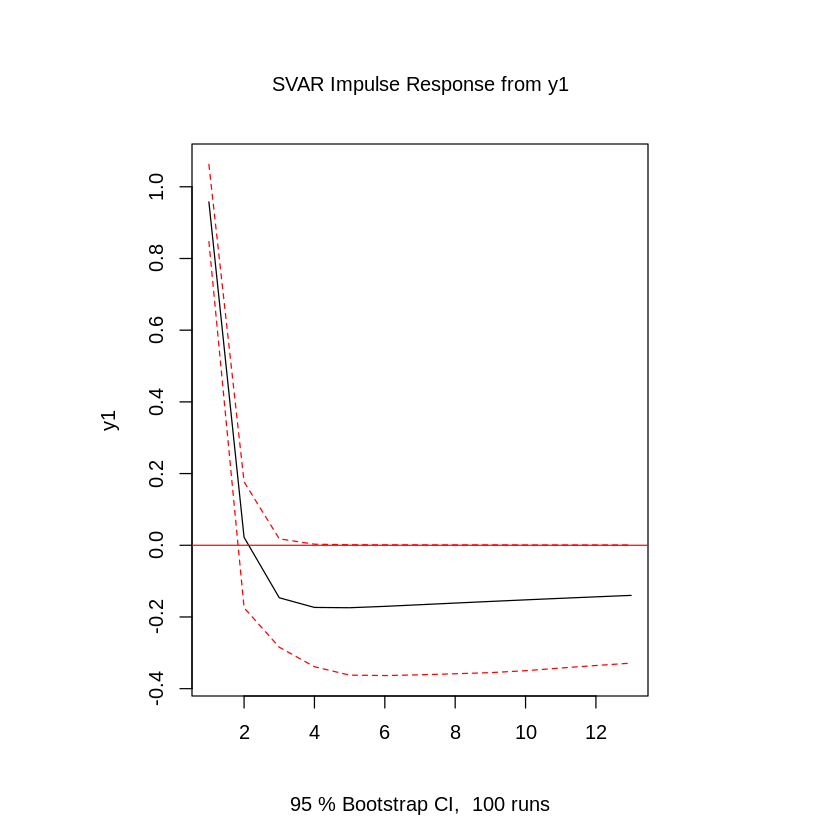

In [81]:
# - 16 e -
#IRF response = "y1", impulse = "y1"
first11 <- irf(svar1, response = "y1", impulse = "y1", 
               n.ahead = 12, ortho = TRUE, boot = TRUE)

#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(first11)

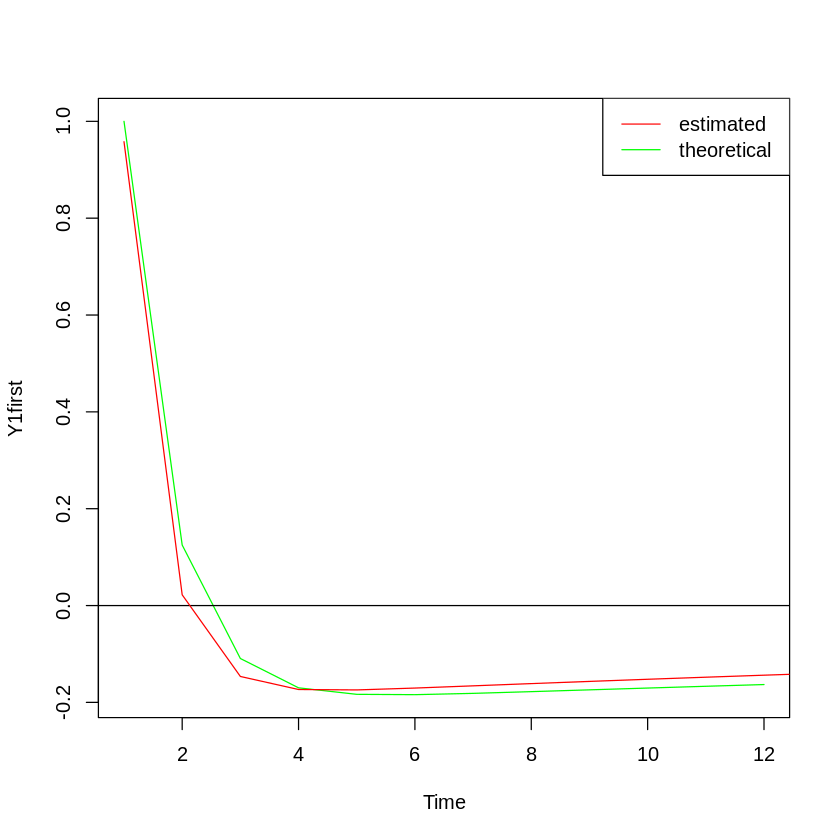

In [82]:

#Добавим теоретически расчитанную
Y1first <- ts(x[,"Y1first"][1:12], frequency=1)

#Сравним
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(Y1first,  col = "green" )
abline(h=0)
lines(first11$irf$y1, col = "red")
legend("topright", border=NULL, legend=c("estimated","theoretical"), lty=c(1,1), col=c("red", "green"))



Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a1, Bmat = b1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod =

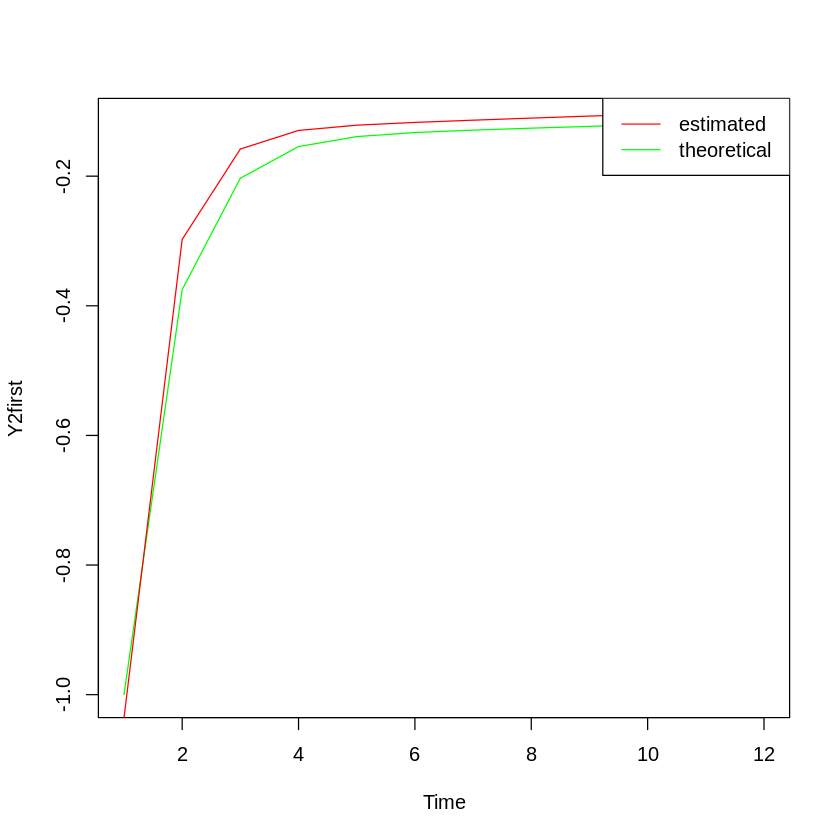

In [83]:

#IRF response = "y2", impulse = "y1"
first21 <- irf(svar1, response = "y2", impulse = "y1", 
               n.ahead = 12, ortho = TRUE, boot = TRUE)
Y2first <- ts(x[,"Y2first"][1:12], frequency=1)

#Сравним
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(Y2first,  col = "green" )
abline(h=0)
lines(first21$irf$y1, col = "red")
legend("topright", border=NULL, legend=c("estimated","theoretical"), lty=c(1,1), col=c("red", "green"))


   Length Class  Mode   
y1 20     -none- numeric
y2 20     -none- numeric

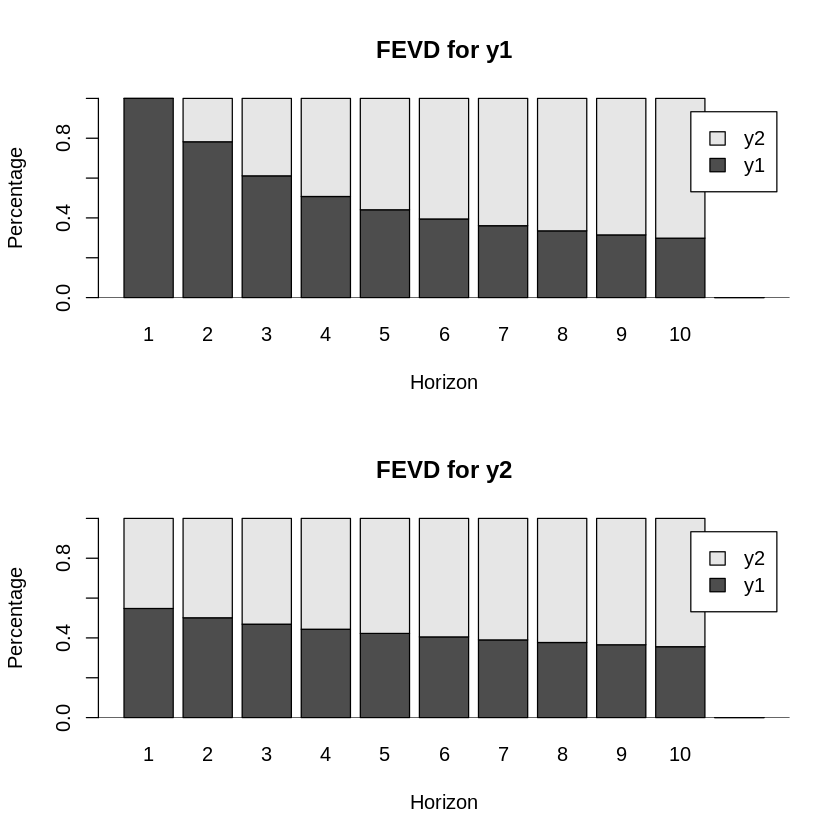

In [85]:

# - 16 f -
#Разложение ошибки 
#library(forecast)
vth1 <- fevd(svar1, n.ahead=10)
summary(vth1)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(vth1)

In [ ]:


# p 438

# - 16 g -

# ДЕЛЕЕ САМОСТОЯТЕЛЬНО

